<a href="https://colab.research.google.com/github/sid1336/Computational-physics/blob/main/feedback_90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utkarsh sachdeva (sid)
<br>
Date: Mar. 27, 2024
<br>
PHYS 2030 W24

__Rubric__ (100 points total):

- Part (a) /__30 points__

- Part (b) /__30 points__

- Part (c) /__40 points__


# <center><font color=#46769B>Exercise 11: Window functions</font></center>

## <font color=#46769B>Introduction</font>

Suppose we have made some measurements of a function $f(t)$, sampling it at constant intervals $h$ to generate $N$ samples $f_n$. Now, we want to analyze it by taking the Discrete Fourier Transform (DFT) to see what kinds of periodic signals it has. Thus far, we have been careful to consider data samples that cover exactly an integer number of periods. However, generally, we don't know ahead of time the period of the signal we are trying to extract. There is no guarantee that the our measurements span exactly an integer number of periods and in general they do not.

It turns out that if you calculate the Fourier coefficients $c_k$ for samples covering a *non-integer* number of periods, you encounter a phenomenon known as __spectral leakage__. This means that Fourier coefficients that are supposed to be zero can be nonzero because power is "leaking" from one value of $k$ to another.

The tool to mitigate spectral leakage is known as a __window function__. Here is the main idea. First, let's recap DFT.
We have $N$ samples, denoted $f_n$, corresponding to samples of our function $f(t)$:

$$f_n = f(t_n) \, .$$

We compute the Fourier coefficients $c_k$ using the DFT:

$$c_k = \frac{1}{N} \sum_{n=0}^N f_n \, e^{-2\pi i k n/N}$$

Now, the main idea of a window function is that we should multiply our function $f(t)$ by a window function $w(t)$ before we take the DFT. Think of a window function as an envelope that modulates the amplitude of our function any way we like. For example, we can choose $w(t)$ to smoothly turn on and off at the edges of our interval. In this way, the edges (and whether they span exactly an integer number of periods) become less important and spectral leakage is minimized.

Here is some code that illustrates the idea of the window function:

- $f(t)$ is the actual function being sampled.

- $w(t)$ is a window function, which is something we can choose.

- The product $w(t) f(t)$ is the quantity for which we calculate the Fourier coefficients $c_k$ using DFT.

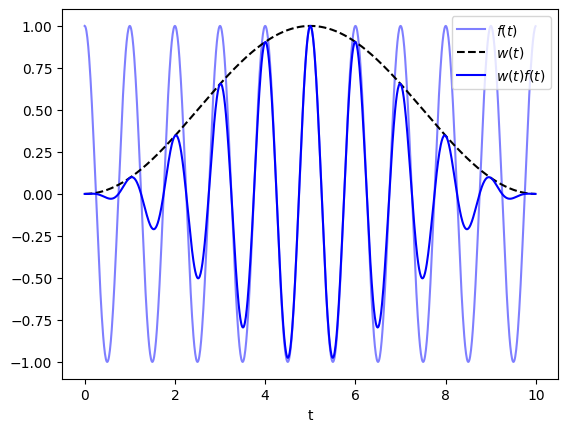

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,10,0.01)

# Example of a periodic function
f = np.cos(2*np.pi*t)

# Example of a window function
w = np.sin(np.pi*t/10)**2

# Plots
plt.plot(t,f,'b',label=r'$f(t)$',alpha=0.5)
plt.plot(t,w,'k--',label=r'$w(t)$')
plt.plot(t,w*f,'b',label=r'$w(t)f(t)$')

plt.legend()
plt.xlabel('t')
plt.show()

Including a window function, the formula for the Fourier coefficients is modified to be

$$c_k = \frac{1}{N} \sum_{n=0}^N w_n \, f_n \, e^{-2\pi i k n/N} \qquad (1)$$

where $w_n$ are samples of our window function

$$w_n = w(t_n) \, .$$

In practice, there is no need to specify what $w(t)$ is. We only need to know $w_n$ and in fact we will call $w_n$ itself *the window function*. Here we will consider a few options:

- *Rectangular window function* (also known as a *box*, *boxcar*, *top-hat*, etc.): This is the case of a uniform window function $w(t) = 1$ over the full time interval considered. (For the purposes of this exercise, this is the same thing as having *no* window function.)

- *Hann window function* (also known as *Hanning*): The window function is
$$w_n = \sin^2\left(\frac{\pi n}{N-1}\right) \, , \quad {\rm where} \; n = 0, 1, ..., N-1. \qquad (2) $$

There are many different types of window functions. There is no one-size-fits-all, but the Hann function is regarded as a reasonably good choice for many situations and is commonly used. Wikipedia has nice introductory articles on [spectral leakage](https://en.wikipedia.org/wiki/Spectral_leakage) and [window functions](https://en.wikipedia.org/wiki/Window_function) for the interested reader.

The goals of this exercise are:

- Introduction to concepts in signal processing

Required reading:
- *Lesson 11: Discrete Fourier Transform*


## <font color=#46769B>Part (a): Rectangular window function</font>

Consider a sinusoidal wave

$$f(t) = \cos(2\pi t)$$

where $t$ is measured in seconds. Note that the frequency of this oscillating wave is $\nu = 1 \; {\rm Hz}$ and its period is $1/\nu = 1 \; {\rm s}$. The goal here is to visualize what spectral leakage looks like for this simple example.

First, we will consider a situation with no spectral leakage. Your tasks are:

- Generate $N = 1000$ samples $f_n$ over time interval $[0,20]$ seconds. (Note the time interval $T=20$ is an integer of the period of the oscillating wave, which was 1.)

- Calculate the Fourier coefficients $c_k$ (with no window function) and the corresponding frequencies $\nu_k$.

- Calculate and plot the power spectrum $P_k = |c_k|^2$ as a function of $\nu_k$.  For your plot, take the range along the $x$-axis to be $[0.5,3]$ Hz and make the $y$-axis a log scale.

Next, you will have a situation with spectral leakage. Your task is:

- Repeat the same tasks except now take $N = 1000$ samples $f_n$ in the range $[0,20.5]$ seconds. (Note the time interval $T=20.5$ is not an integer multiple of the period of the oscillating wave.)

In the first case, there is no spectral leakage since we have an integer number of periods and you should see a very sharp peak at $\nu_k = 1\; {\rm Hz}$. In the second case, you see the effect of spectral leakage: there is still a peak, but it is broader.

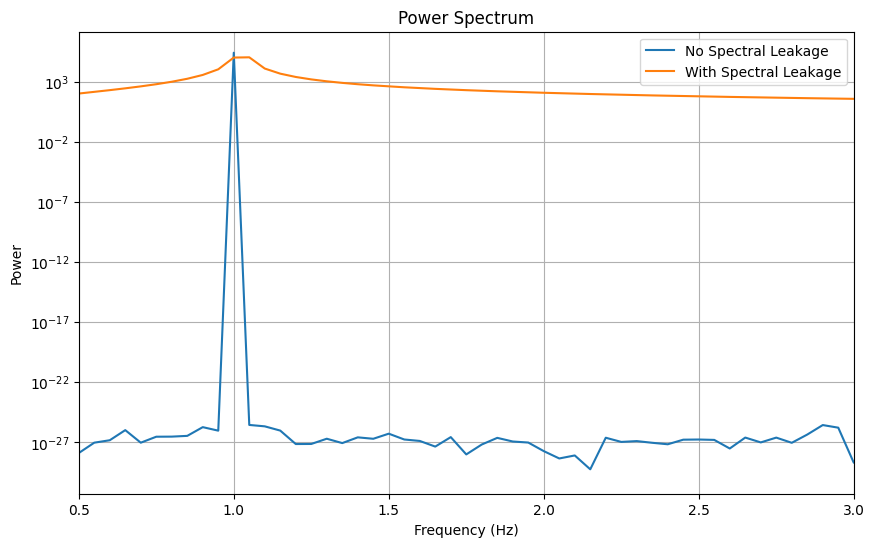

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 1000  # Number of samples
T = 20  # Time interval for the first case
T_leakage = 20.5  # Time interval for the second case
t = np.linspace(0, T, N, endpoint=False)  # Time array for the first case
t_leakage = np.linspace(0, T_leakage, N, endpoint=False)  # Time array for the second case
nu = np.fft.fftfreq(N, d=T/N)  # Frequencies

# Define the function
def f(t):
    return np.cos(2 * np.pi * t)

# Generate samples
f_samples = f(t)
f_samples_leakage = f(t_leakage)

# Calculate Fourier coefficients (without window function)
c_k = np.fft.fft(f_samples)
c_k_leakage = np.fft.fft(f_samples_leakage)

# Calculate power spectrum
P_k = np.abs(c_k)**2
P_k_leakage = np.abs(c_k_leakage)**2


sort = np.argsort(nu)
nu, P_k, P_k_leakage= nu[sort], P_k[sort], P_k_leakage[sort]
# Plot power spectrum
plt.figure(figsize=(10, 6))
plt.plot(nu, P_k, label='No Spectral Leakage')
plt.plot(nu, P_k_leakage, label='With Spectral Leakage')
plt.xlim(0.5, 3)
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power Spectrum')
plt.legend()
plt.grid(True)
plt.show()

## <font color=#46769B>Part (b)</font>

Your task is:

- Repeat all the steps of Part (a) with a __Hann window function__ given in Eq. (2).

For your plot, show your results for the power spectra from Parts (a) and (b) *all on the same plot*. Include a legend. You should have four curves on your plot: rectangular window function with $T=20$ and $T=20.5$ and Hann window function with $T=20$ and $T=20.5$.

The main takeaway is that for the case with spectral leakage ($T=20.5$), taking a rectangular window function leads to large tails around the true peak at $\nu=1$, whereas the Hann window function mitigates this effect and the tails are smaller.

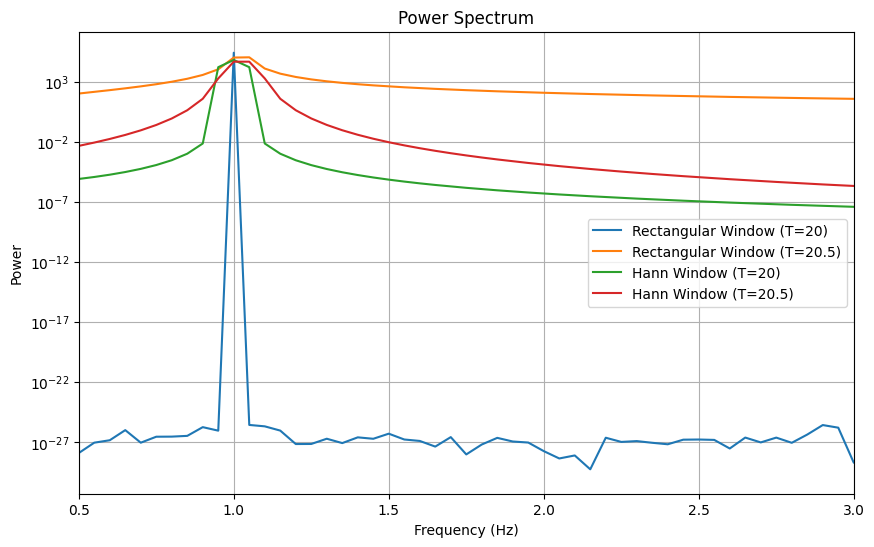

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 1000  # Number of samples
T = 20  # Time interval for the first case
T_leakage = 20.5  # Time interval for the second case
t = np.linspace(0, T, N, endpoint=False)  # Time array for the first case
t_leakage = np.linspace(0, T_leakage, N, endpoint=False)  # Time array for the second case
nu = np.fft.fftfreq(N, d=T/N)  # Frequencies

# Define the function
def f(t):
    return np.cos(2 * np.pi * t)

# Define Hann window function
def hann_window(N):
    return np.sin(np.pi * np.arange(N) / (N - 1))**2

# Generate samples
f_samples = f(t)
f_samples_leakage = f(t_leakage)

# Apply Hann window function
hann_window_samples = hann_window(N)
f_samples_hann = f_samples * hann_window_samples
f_samples_leakage_hann = f_samples_leakage * hann_window_samples

# Calculate Fourier coefficients (without window function)
c_k = np.fft.fft(f_samples)
c_k_leakage = np.fft.fft(f_samples_leakage)

# Calculate Fourier coefficients (with Hann window function)
c_k_hann = np.fft.fft(f_samples_hann)
c_k_leakage_hann = np.fft.fft(f_samples_leakage_hann)

# Calculate power spectrum
P_k = np.abs(c_k)**2
P_k_leakage = np.abs(c_k_leakage)**2
P_k_hann = np.abs(c_k_hann)**2
P_k_leakage_hann = np.abs(c_k_leakage_hann)**2


sort = np.argsort(nu)
nu, P_k, P_k_leakage, P_k_hann, P_k_leakage_hann = nu[sort], P_k[sort], P_k_leakage[sort], P_k_hann[sort], P_k_leakage_hann[sort]
# Plot power spectrum
plt.figure(figsize=(10, 6))
plt.plot(nu, P_k, label='Rectangular Window (T=20)')
plt.plot(nu, P_k_leakage, label='Rectangular Window (T=20.5)')
plt.plot(nu, P_k_hann, label='Hann Window (T=20)')
plt.plot(nu, P_k_leakage_hann, label='Hann Window (T=20.5)')
plt.xlim(0.5, 3)
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power Spectrum')
plt.legend()
plt.grid(True)
plt.show()

## <font color=#46769B>Part (c)</font>

Now, you will apply your knowledge to a more real-world example: here is a one-second digital clip of a flute playing a [D-note](https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/blob/main/data/flute-d4.wav) (attribution: [MTG](https://freesound.org/s/354672/)). As you will see, this single note is not a single-frequency wave but is actually a superposition of waves of different frequencies. The advantage of working in the frequency domain is that periodic signals appear as peaks in the power spectrum, which makes it easier to distinguish the different frequencies in a signal.

First, run the following cell to load this file and save the sound wave as a `numpy.array`, which will provide our samples $f_n$. Loading the sound file also yields the sampling rate, $h^{-1}$ (`sample_rate`), which is inversely related to the step size $h$. With $h$, we can extract the sampling times $t_n$.

We also plot the amplitude of the sound wave as a function of time. Even though the sound file goes for 1 second, we plot only the first $\sim 0.1$ seconds for visual clarity.

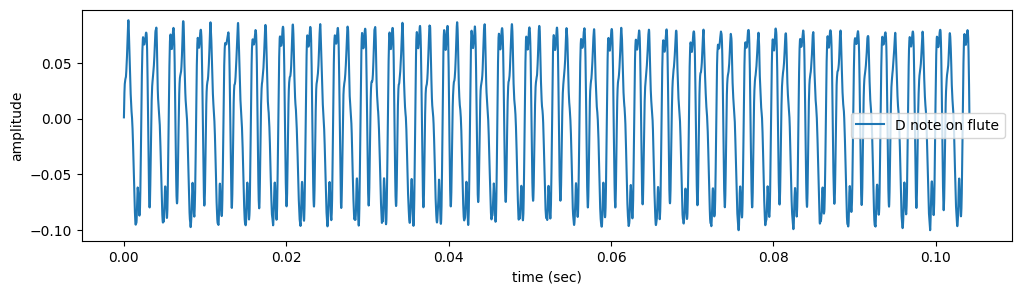

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import urllib.request
import soundfile

path = "https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/blob/main/data/flute-d4.wav?raw=true"
tmp_file = urllib.request.urlretrieve(path)[0]
data, sample_rate = soundfile.read(tmp_file)

fn = data
N = len(fn)
h = 1/sample_rate
tn = np.array(range(N)) * h

plt.figure(figsize=(12,3))
plt.plot(tn[:5000],fn[:5000],label='D note on flute')
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.legend()
plt.show()

Your tasks are as follows:

- Calculate the power spectrum with a rectangular window function.

- Calculate the power spectrum with a Hann window function.

- Plot both power spectra on the sample plot as a function of frequency, over the range $[100,2000] \; {\rm Hz}$. Include a legend and choose a log scale for the $y$-axis.

You should find that the flute note has a peak at $\nu_k = 296.5 \; {\rm Hz}$ and at integer multiples of this value, and that between the peaks, the Hann window function has less power (i.e., spectral leakage is minimized).



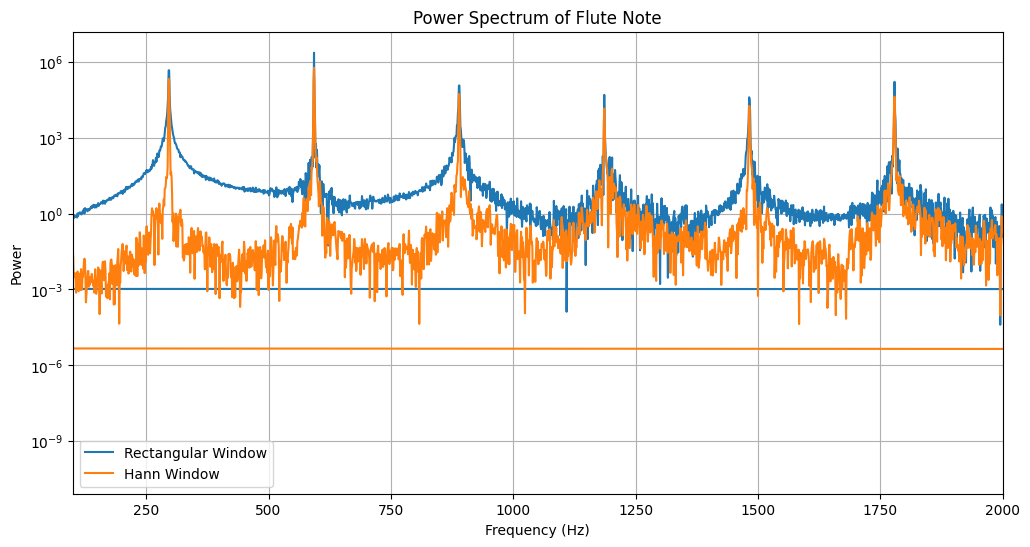

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import urllib.request
import soundfile

# Load the sound file
path = "https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/blob/main/data/flute-d4.wav?raw=true"
tmp_file = urllib.request.urlretrieve(path)[0]
data, sample_rate = soundfile.read(tmp_file)

# Extract samples and sampling times
fn = data
N = len(fn)
h = 1/sample_rate
tn = np.array(range(N)) * h

# Define Hann window function
def hann_window(N):
    return np.sin(np.pi * np.arange(N) / (N - 1))**2

# Compute power spectrum with rectangular window function
ck_rectangular = np.fft.fft(fn)
P_k_rectangular = np.abs(ck_rectangular)**2

# Compute power spectrum with Hann window function
hann_window_samples = hann_window(N)
fn_hann = fn * hann_window_samples
ck_hann = np.fft.fft(fn_hann)
P_k_hann = np.abs(ck_hann)**2

# Frequencies
nu = np.fft.fftfreq(N, d=h)

# Plot power spectra
plt.figure(figsize=(12, 6))
plt.plot(nu, P_k_rectangular, label='Rectangular Window')
plt.plot(nu, P_k_hann, label='Hann Window')
plt.xlim(100, 2000)
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power Spectrum of Flute Note')
plt.legend()
plt.grid(True)
plt.show()